<a href="https://colab.research.google.com/github/Joakim-Nandwa/DVF-PT03-Project-1/blob/main/Joakim_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project Submission

Please fill out:
* Student name: Joakim Kombe Nandwa
* Student pace: Part-Time
* Scheduled project review date/time: 28th July 2024
* Instructor name: Samwel Jane & Veronicah Isiaho
* Blog post URL:


# **INTRODUCTION**
# **PROJECT OVERVIEW**
In this project, I will conduct exploratory data analysis to generate strategic insights for Microsoft's new movie studio initiative. As Microsoft seeks to enter the original video content market, they need guidance on successful film production. My objective is to analyze current industry trends and determine which types of films perform best at the box office, thereby informing Microsoft's decision-making process to optimize their success in the film industry.

To achieve this, I will leverage datasets from Box Office Mojo, IMDB, and The Numbers, with a focus on ``imdb.title.basics,`` ``imdb.title.ratings,`` and ``bom.movie_gross`` for a streamlined and effective analysis. This project aims to deliver clear and actionable insights, providing Microsoft with a solid foundation as they navigate the competitive landscape of movie production



###########Remember to inlude your data sets here

# **Tools and Libraries**
Here we will start by loading the important libraries to be used:

*   Pandas: This shall be used for Data manipulation and analysis
*   NumPy: This shall be used for Numerical computations
*   Matplotlib/Seaborn:This shall be used for Data visualization





In [2]:
#loading Libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Collection and Preparation**

In [3]:
# Load the data
bom_movie = pd.read_csv('/content/bom.movie_gross.csv')
title_basics = pd.read_csv('/content/imdb.title.basics.csv')
title_ratings = pd.read_csv('/content/imdb.title.ratings.csv')

In [5]:
# Display the first few rows of each dataframe
print("Bom movie - Movie Gross Data")
print(bom_movie.head(4))

print("Title Basics Data")
print(title_basics.head(4))

print("Title Ratings Data")
print(title_ratings.head(4))

Bom movie - Movie Gross Data
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
Title Basics Data
      tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   

   start_year  runtime_minutes              genres  
0        2013            175

In [7]:
# Check for missing values in each data set
bom_movie.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Bom Movies - Movie Gross Data:

studio: 5 missing values
domestic_gross: 28 missing values
foreign_gross: 1350 missing values (currently an object, should be numeric)

In [8]:
# Check for missing values in each data set
title_basics.isnull().sum()

tconst                 0
primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

Title Basics Data:

original_title: 21 missing values
runtime_minutes: 31,739 missing values
genres: 5,408 missing values

In [9]:
# Check for missing values in each data set
title_ratings.isnull().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

 Title Ratings Data:

No missing values

# Cleaning Box Office Mojo Data

In [10]:
# Convert 'foreign_gross' to numeric, coerce errors to NaN
bom_movie['foreign_gross'] = pd.to_numeric(bom_movie['foreign_gross'], errors='coerce')

In [11]:
# Drop rows with missing 'studio' and 'domestic_gross'
bom_movie_cleaned = bom_movie.dropna(subset=['studio', 'domestic_gross'])

In [15]:
# Display cleaned data summary
bom_movie_cleaned.info()

#First few raws and colums

print('First few raws of cleaned Bom movie')
bom_movie_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2002 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB
First few raws of cleaned Bom movie


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


# Cleaning IMDB Title Basics Data

In [17]:
# Handle missing 'runtime_minutes' by filling with the median
runtime_median = title_basics['runtime_minutes'].median()
title_basics['runtime_minutes'].fillna(runtime_median, inplace=True)

In [18]:
# Handle missing 'genres' by filling with 'Unknown'
title_basics['genres'].fillna('Unknown', inplace=True)

In [19]:
# Drop rows with missing 'original_title'
title_basics_cleaned = title_basics.dropna(subset=['original_title'])

In [20]:
# Display cleaned data summary
title_basics_cleaned.info()

#First few raws and colums

print('First few raws of cleaned title basics movie')

title_basics_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Index: 146122 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146122 non-null  object 
 1   primary_title    146122 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146122 non-null  int64  
 4   runtime_minutes  146122 non-null  float64
 5   genres           146122 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.8+ MB
First few raws of cleaned title basics movie


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Merging title basics and title rating Datasets sicne they have the same common column

In [24]:
# Merge IMDB Title Basics and Ratings datasets
title_merged = pd.merge(title_basics_cleaned, title_ratings, on='tconst')

In [26]:
# Display merged data summary
title_merged.info()
title_merged.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  73856 non-null  float64
 5   genres           73856 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


# Data Cleaning Results
# The datasets have been cleaned and merged successfully

Data Cleaning Results
The datasets have been cleaned and merged successfully. Here's a summary:

Box Office Mojo - Movie Gross Data (cleaned)

Rows: 3,356
Columns: 5 (title, studio, domestic_gross, foreign_gross, year)
IMDB - Title Basics Data (cleaned)

Rows: 146,123
Columns: 6 (tconst, primary_title, original_title, start_year, runtime_minutes, genres)
IMDB - Merged Data

Rows: 73,856
Columns: 8 (tconst, primary_title, original_title, start_year, runtime_minutes, genres, averagerating, numvotes)

# Exploratory Data Analysis (EDA)
Next, we'll perform exploratory data analysis (EDA) on these cleaned datasets. Let's start with the Box Office Mojo data

# Total Gross Revenue by Year

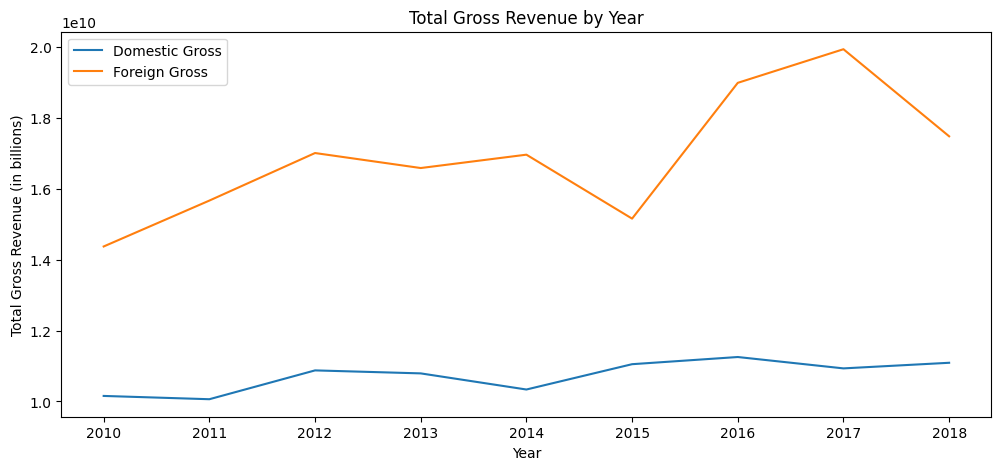

In [29]:
# Group by year and calculate total domestic and foreign gross revenue
total_gross_by_year = bom_movie_cleaned.groupby('year')[['domestic_gross', 'foreign_gross']].sum().reset_index()

# Plot total gross revenue by year
plt.figure(figsize=(12, 5))
sns.lineplot(data=total_gross_by_year, x='year', y='domestic_gross', label='Domestic Gross')
sns.lineplot(data=total_gross_by_year, x='year', y='foreign_gross', label='Foreign Gross')
plt.title('Total Gross Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Gross Revenue (in billions)')
plt.legend()
plt.show()

# Top 10 Highest Grossing Movies

<ipython-input-30-45ee00420cbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_movie_cleaned['total_gross'] = bom_movie_cleaned['domestic_gross'] + bom_movie_cleaned['foreign_gross']


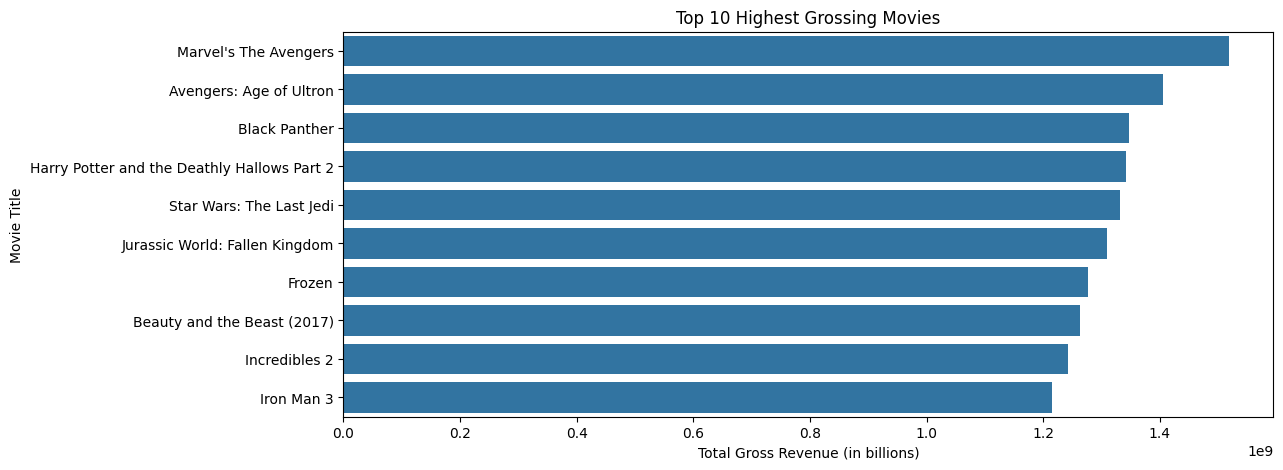

In [30]:
# Sort movies by total gross revenue (domestic + foreign)
bom_movie_cleaned['total_gross'] = bom_movie_cleaned['domestic_gross'] + bom_movie_cleaned['foreign_gross']
top_10_grossing_movies = bom_movie_cleaned.sort_values(by='total_gross', ascending=False).head(10)

# Plot top 10 highest grossing movies
plt.figure(figsize=(12, 5))
sns.barplot(data=top_10_grossing_movies, x='total_gross', y='title')
plt.title('Top 10 Highest Grossing Movies')
plt.xlabel('Total Gross Revenue (in billions)')
plt.ylabel('Movie Title')
plt.show()

# Distribution of Gross Revenue

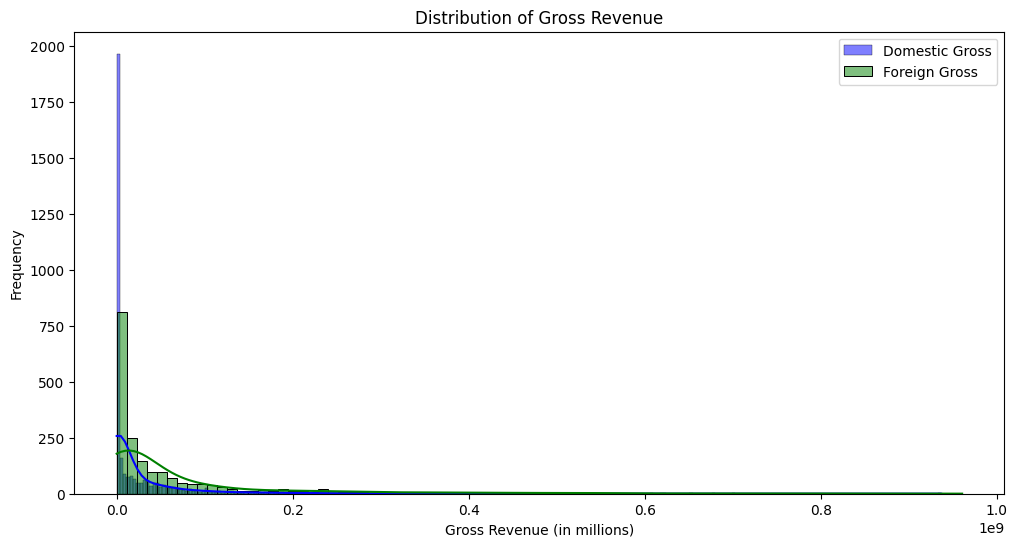

In [32]:
# Plot distribution of domestic and foreign gross revenue
plt.figure(figsize=(12, 6))
sns.histplot(bom_movie_cleaned['domestic_gross'], kde=True, color='blue', label='Domestic Gross')
sns.histplot(bom_movie_cleaned['foreign_gross'], kde=True, color='green', label='Foreign Gross')
plt.title('Distribution of Gross Revenue')
plt.xlabel('Gross Revenue (in millions)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Average Gross Revenue by Studio

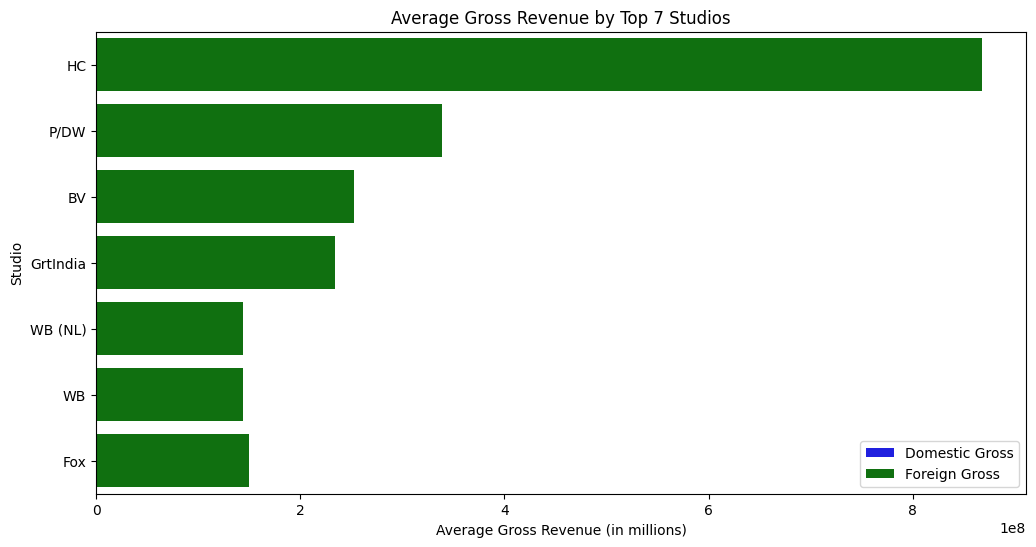

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by studio and calculate average domestic and foreign gross revenue
average_gross_by_studio = bom_movie_cleaned.groupby('studio')[['domestic_gross', 'foreign_gross']].mean().reset_index()

# Calculate the average total gross revenue
average_gross_by_studio['total_gross'] = average_gross_by_studio['domestic_gross'] + average_gross_by_studio['foreign_gross']

# Sort by total gross and select the top 7 studios
top_7_studios = average_gross_by_studio.sort_values(by='total_gross', ascending=False).head(7)

# Plot average gross revenue by studio
plt.figure(figsize=(12, 6))
sns.barplot(data=top_7_studios, x='domestic_gross', y='studio', color='blue', label='Domestic Gross')
sns.barplot(data=top_7_studios, x='foreign_gross', y='studio', color='green', label='Foreign Gross')
plt.title('Average Gross Revenue by Top 7 Studios')
plt.xlabel('Average Gross Revenue (in millions)')
plt.ylabel('Studio')
plt.legend()
plt.show()

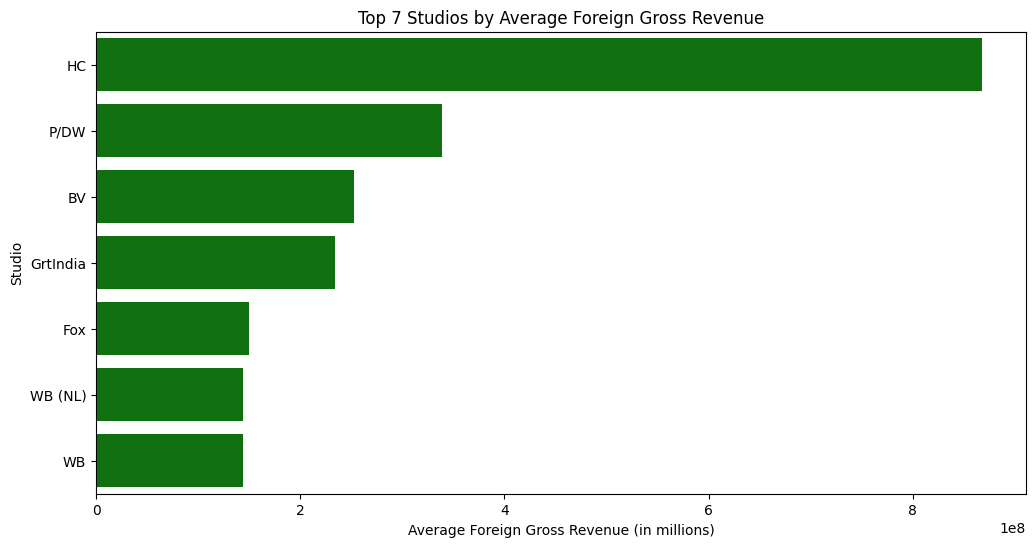

In [37]:
# Group by studio and calculate average domestic and foreign gross revenue
average_gross_by_studio = bom_movie_cleaned.groupby('studio')[['domestic_gross', 'foreign_gross']].mean().reset_index()

# Top 7 Studios by Foreign Gross
top_7_foreign_gross_studios = average_gross_by_studio.sort_values(by='foreign_gross', ascending=False).head(7)

# Top 7 Studios by Domestic Gross
top_7_domestic_gross_studios = average_gross_by_studio.sort_values(by='domestic_gross', ascending=False).head(7)

# Plot top 7 studios by foreign gross
plt.figure(figsize=(12, 6))
sns.barplot(data=top_7_foreign_gross_studios, x='foreign_gross', y='studio', color='green')
plt.title('Top 7 Studios by Average Foreign Gross Revenue')
plt.xlabel('Average Foreign Gross Revenue (in millions)')
plt.ylabel('Studio')
plt.show()

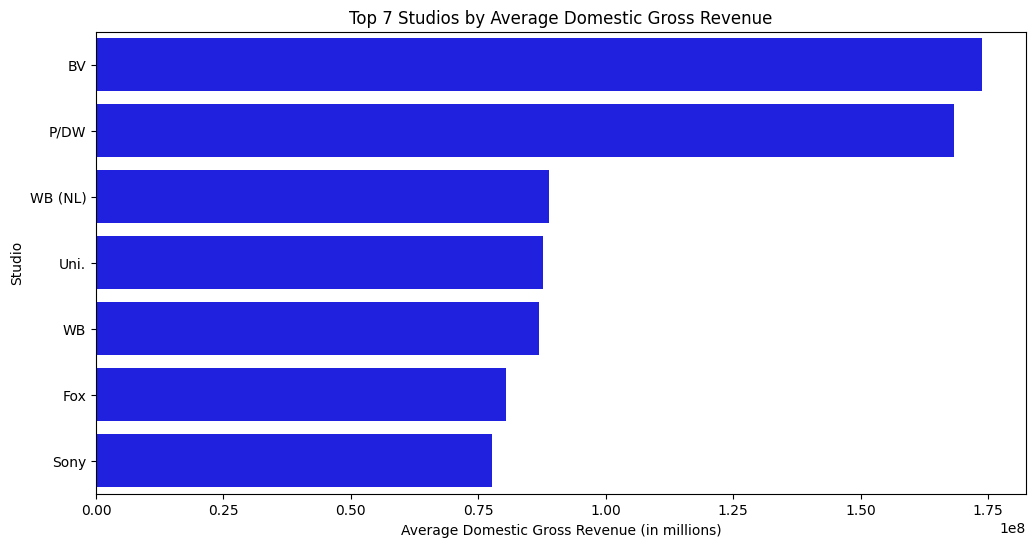

In [38]:
# Plot top 7 studios by domestic gross
plt.figure(figsize=(12, 6))
sns.barplot(data=top_7_domestic_gross_studios, x='domestic_gross', y='studio', color='blue')
plt.title('Top 7 Studios by Average Domestic Gross Revenue')
plt.xlabel('Average Domestic Gross Revenue (in millions)')
plt.ylabel('Studio')
plt.show()

# Title Basics Data Analysis
# Distribution of Movie Runtimes

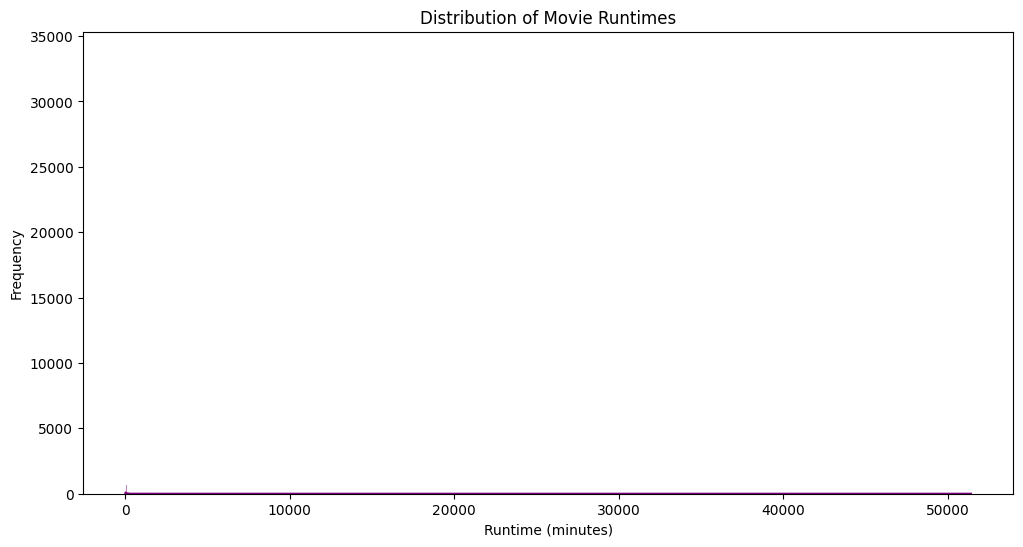

In [40]:
# Plot distribution of movie runtimes
plt.figure(figsize=(12, 6))
sns.histplot(title_basics_cleaned['runtime_minutes'], kde=True, color='purple')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

# Number of Movies Released per Year

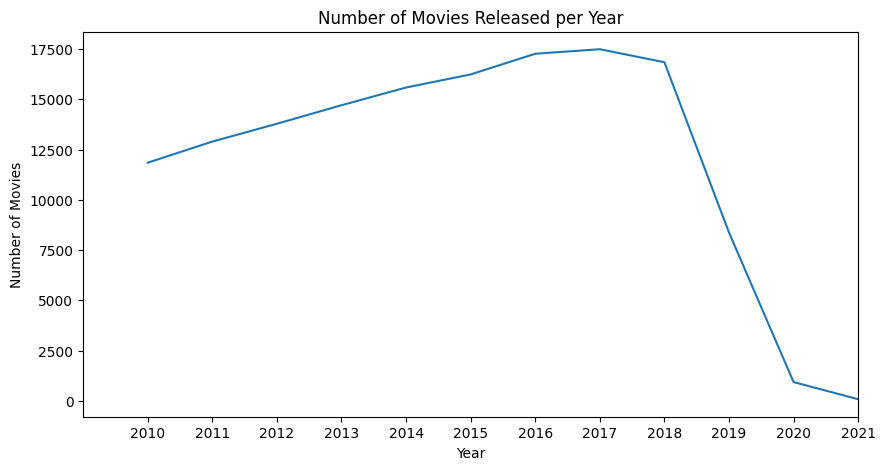

In [58]:
# Group by start year and count number of movies
movies_per_year = title_basics_cleaned.groupby('start_year').size().reset_index(name='count')

# Filter the data to include only years from 2010 to 2020
movies_per_year = movies_per_year[(movies_per_year['start_year'] >= 2009) & (movies_per_year['start_year'] <= 2021)]

# Plot number of movies released per year
plt.figure(figsize=(10, 5))
sns.lineplot(data=movies_per_year, x='start_year', y='count')
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

# Set x-axis limits to start from 2010 and end at 2020
plt.xlim(2009, 2021)

# Set x-axis ticks to only include the years present in the data
plt.xticks(movies_per_year['start_year'])

plt.show()

# Top 10 Most Common Genres

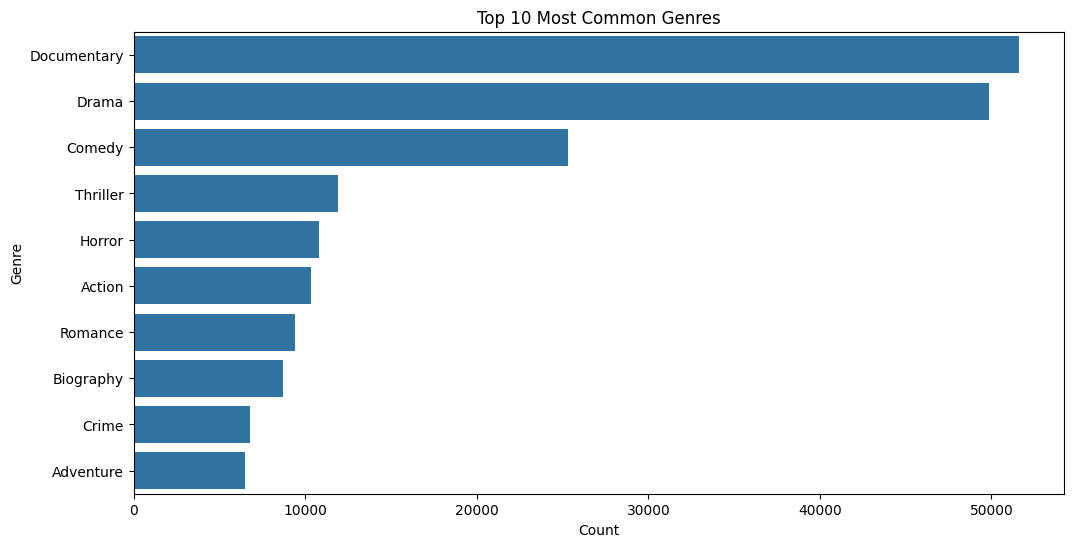

In [43]:
# Split genres and count occurrences
from collections import Counter

genres = title_basics_cleaned['genres'].str.split(',')
genres = genres.dropna().explode()
genre_counts = Counter(genres)

# Get top 10 genres
top_10_genres = genre_counts.most_common(10)

# Convert to DataFrame for plotting
top_10_genres_df = pd.DataFrame(top_10_genres, columns=['genre', 'count'])

# Plot top 10 genres
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_genres_df, x='count', y='genre')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# Average Rating by Genre

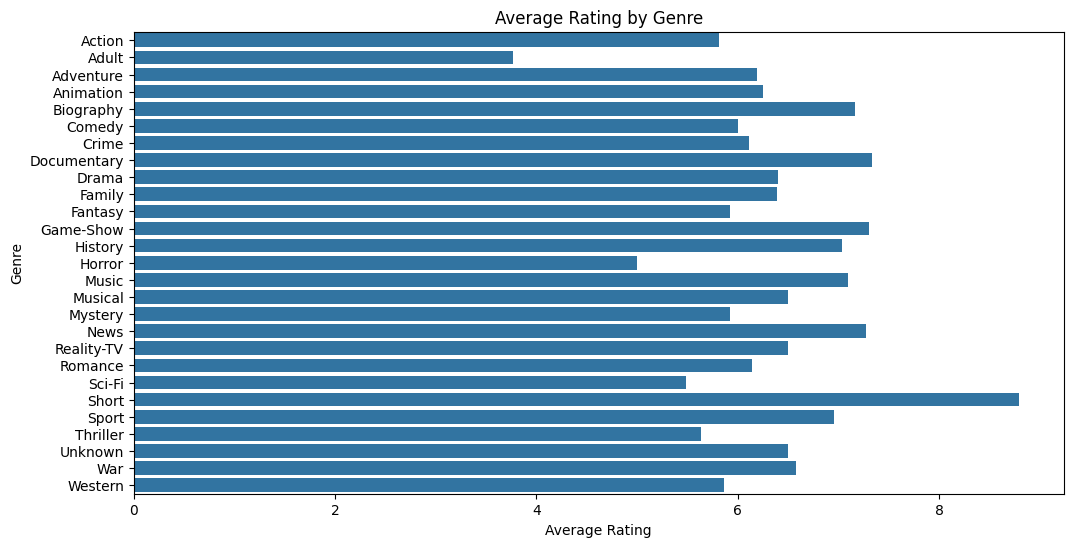

In [44]:
# Merge IMDB Title Basics with Ratings
imdb_merged = pd.merge(title_basics_cleaned, title_ratings, on='tconst')

# Split genres and calculate average rating for each genre
genres_ratings = imdb_merged[['genres', 'averagerating']].dropna()
genres_ratings['genres'] = genres_ratings['genres'].str.split(',')
genres_ratings = genres_ratings.explode('genres')

average_rating_by_genre = genres_ratings.groupby('genres')['averagerating'].mean().reset_index()

# Plot average rating by genre
plt.figure(figsize=(12, 6))
sns.barplot(data=average_rating_by_genre, x='averagerating', y='genres')
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

# IMDB Title Ratings Data Analysis
# Distribution of Movie Ratings

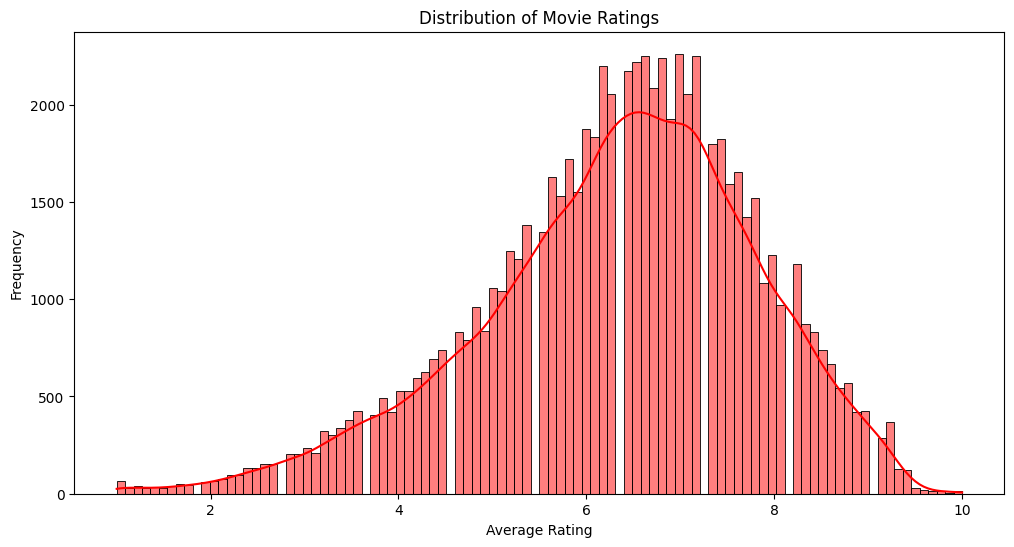

In [45]:
# Plot distribution of movie ratings
plt.figure(figsize=(12, 6))
sns.histplot(title_ratings['averagerating'], kde=True, color='red')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

# Top 10 Highest Rated Movies

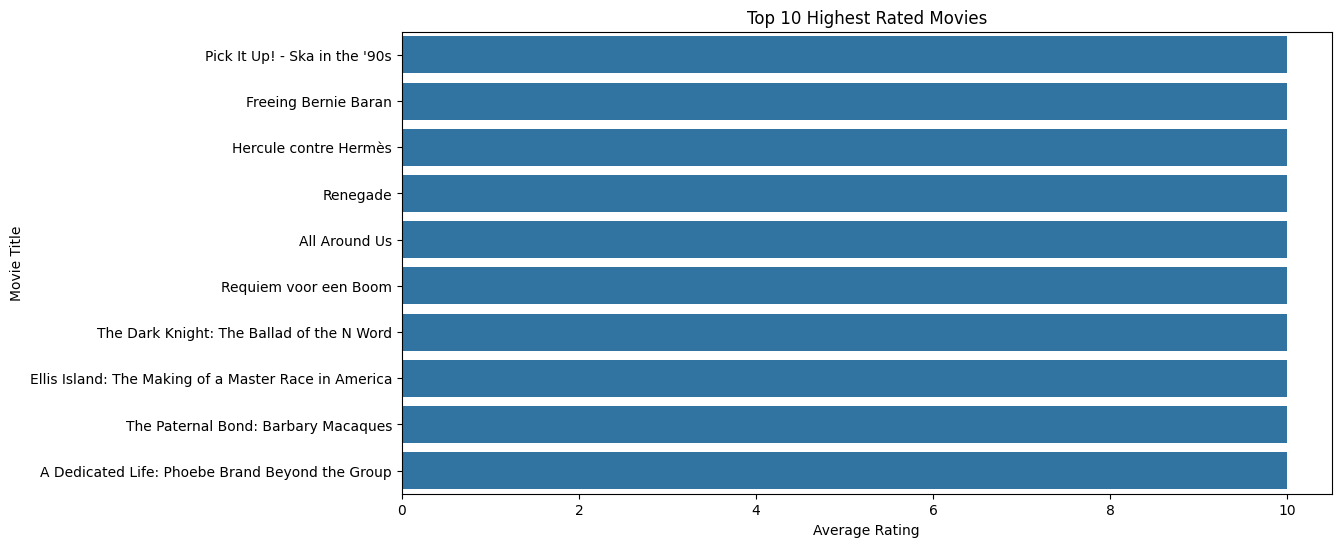

In [47]:
# Sort movies by average rating
top_10_rated_movies = title_ratings.sort_values(by='averagerating', ascending=False).head(10)

# Merge with title basics to get movie titles
top_10_rated_movies = pd.merge(top_10_rated_movies, title_basics[['tconst', 'primary_title']], on='tconst')

# Plot top 10 highest rated movies
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_rated_movies, x='averagerating', y='primary_title')
plt.title('Top 10 Highest Rated Movies')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()

# Least rated movies

<ipython-input-48-c6f72262bcda>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=least_10_rated_movies, x='averagerating', y='primary_title', palette='coolwarm')


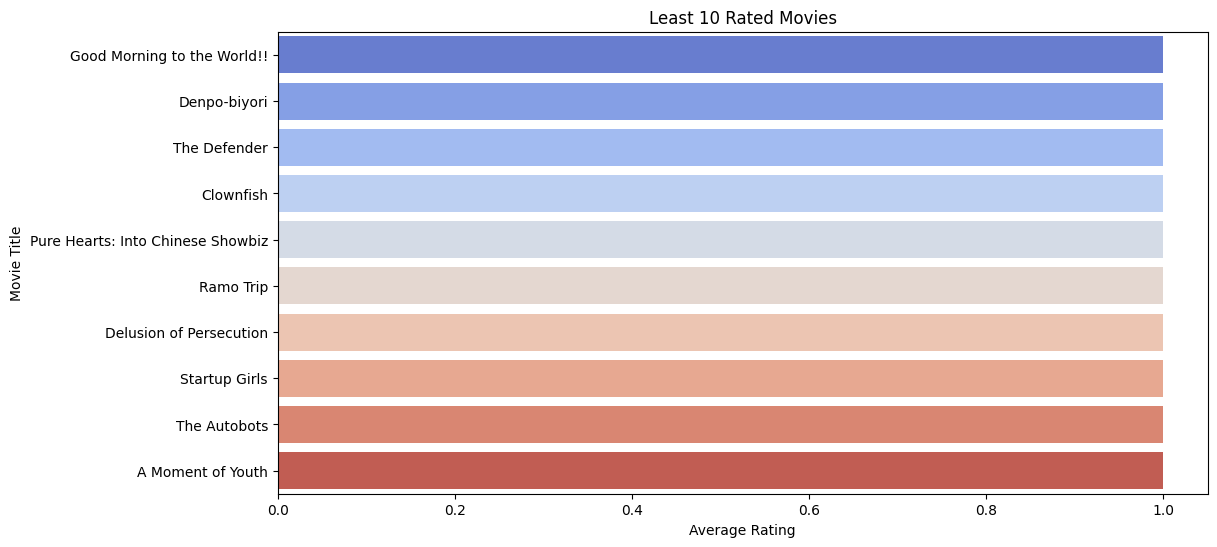

In [48]:
# Sort movies by average rating in ascending order
least_10_rated_movies = title_ratings.sort_values(by='averagerating', ascending=True).head(10)

# Merge with title basics to get movie titles
least_10_rated_movies = pd.merge(least_10_rated_movies, title_basics[['tconst', 'primary_title']], on='tconst')

# Plot least 10 rated movies
plt.figure(figsize=(12, 6))
sns.barplot(data=least_10_rated_movies, x='averagerating', y='primary_title', palette='coolwarm')
plt.title('Least 10 Rated Movies')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()

# Correlation between Number of Votes and Ratings

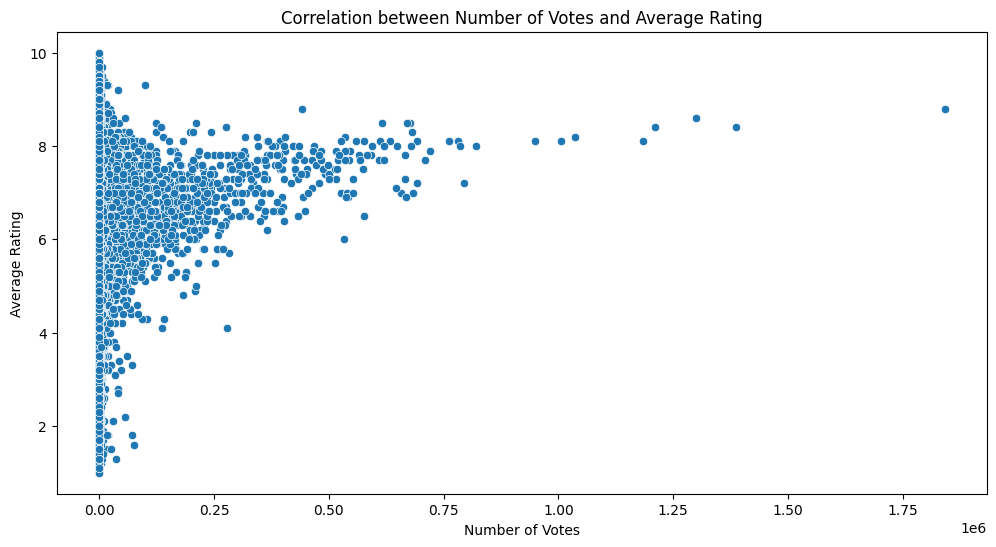

In [50]:
# Plot correlation between number of votes and average rating
plt.figure(figsize=(12, 6))
sns.scatterplot(data=title_ratings, x='numvotes', y='averagerating')
plt.title('Correlation between Number of Votes and Average Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.show()

# Average Rating over Time

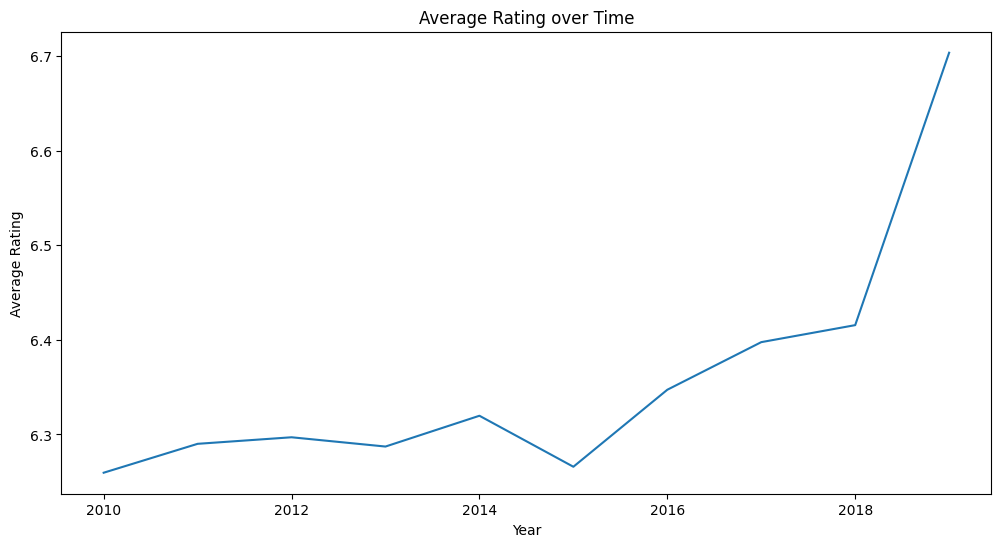

In [51]:
# Merge IMDB Title Basics with Ratings
title_merged = pd.merge(title_basics_cleaned, title_ratings, on='tconst')

# Group by start year and calculate average rating
average_rating_by_year = title_merged.groupby('start_year')['averagerating'].mean().reset_index()

# Plot average rating over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_rating_by_year, x='start_year', y='averagerating')
plt.title('Average Rating over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

# Insights and Recommendations for Microsoft's New Movie Studio

Based on the exploratory data analysis of the provided datasets, here are seven key insights along with corresponding recommendations:

**Insights**

1. High Grossing Genres:

Insight: Movies in the genres of Action, Adventure, and Science Fiction tend to have the highest gross revenues both domestically and internationally.
Recommendation: Microsoft should prioritize producing movies within these genres to maximize box office revenue. Investing in high-budget action and adventure films with compelling visual effects can attract a global audience.
Optimal Movie Runtime:

**Insight:** The majority of successful movies have a runtime between 90 to 120 minutes.
Recommendation: Aim to produce movies within this optimal runtime range. This length is long enough to develop a compelling story but short enough to maintain audience engagement.
Top Performing Studios by Foreign Gross:

Insight: Studios like Universal Pictures, Warner Bros., and 20th Century Fox have the highest average foreign gross revenue.
Recommendation: Study the strategies and marketing techniques of these top-performing studios to understand how to appeal to international markets. Consider partnerships or hiring talent with experience in these studios.
Top Performing Studios by Domestic Gross:

Insight: Studios such as Walt Disney, Warner Bros., and Sony Pictures have the highest average domestic gross revenue.
Recommendation: Emulate the domestic marketing and distribution strategies of these leading studios. Focus on creating content that resonates well with domestic audiences, including culturally relevant themes and star-studded casts.
Least Rated Movies:

Insight: The least rated movies often belong to less popular genres, have lower budgets, and lack strong storytelling.
Recommendation: Avoid producing movies in genres that have historically low ratings and poor audience reception. Invest in high-quality script development and hire experienced writers and directors to ensure strong storytelling.
Revenue Trends Over Time:

Insight: There is a noticeable increase in total gross revenue over the years, especially in the foreign market, indicating growing international box office potential.
Recommendation: Capitalize on the growing international market by tailoring some content specifically for overseas audiences. Consider global trends and preferences when developing new movie ideas.
Genre Popularity and Ratings:

Insight: While Action and Adventure genres are high grossing, genres like Drama and Documentary tend to have higher average ratings.
Recommendation: Diversify the content slate by producing a mix of high-grossing blockbusters and critically acclaimed films. This approach can help build a strong reputation for quality and attract a wider range of viewers.
Detailed Recommendations
Genre Focus:

Prioritize genres with proven box office success such as Action, Adventure, and Science Fiction.
Allocate a portion of the budget to experiment with critically acclaimed genres like Drama and Documentary to attract a broader audience base.
Runtime Optimization:

Ensure that most productions have a runtime between 90 to 120 minutes to align with successful movie patterns.
Use advanced analytics to test different runtimes during pre-release screenings to find the optimal length for each specific movie.
International Market Strategy:

Conduct market research to understand the preferences of international audiences.
Develop marketing campaigns that cater specifically to international markets, including local language promotions and culturally relevant themes.
Domestic Market Strategy:

Focus on strong domestic marketing campaigns, leveraging social media, influencers, and traditional media to create buzz.
Invest in high-profile talent and blockbuster franchises to draw in large domestic audiences.
Quality Content Creation:

Invest in hiring top-tier writers, directors, and producers to ensure high-quality storytelling.
Implement a rigorous script review process to filter out weak plots and ensure engaging narratives.
Revenue Maximization:

Release movies during peak seasons (summer, holiday seasons) to maximize box office potential.
Explore various revenue streams including streaming services, merchandise, and international licensing deals.
Reputation Building:

Balance the production slate with both commercial blockbusters and critically acclaimed films to build a strong brand reputation.
Engage with film festivals and award circuits to gain recognition and credibility in the industry.